# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [60]:
# Load pickled data
import pickle
from reusable import load

data = load.load_data()

print("Done!")

X_train, y_train = (data.train.features, data.train.labels)
X_test, y_test = (data.test.features, data.test.labels)

Loading project data.
Data already unzipped.
Returning ProjectData(train, test).
Done!


In [61]:
iteration = "0"

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [62]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (len(X_train[0]), len(X_train[0][0]), len(X_train[0][0][0]))

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

End of no passing by vehicles over 3.5 metric tons


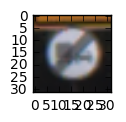

In [63]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv
import numpy as np
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def load_csv_to_dict(csv_file):
  with open(csv_file, mode='r') as infile:
    reader = csv.reader(infile)
    return {rows[0]:rows[1] for rows in reader}
  
sign_dict = load_csv_to_dict("../signnames.csv")

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(sign_dict[str(y_train[index])])

[('Speed limit (20km/h)', 210), ('Dangerous curve to the left', 210), ('Go straight or left', 210), ('Pedestrians', 240), ('End of all speed and passing limits', 240)]
[('Speed limit (50km/h)', 2250), ('Speed limit (30km/h)', 2220), ('Yield', 2160), ('Priority road', 2100), ('Keep right', 2070)]


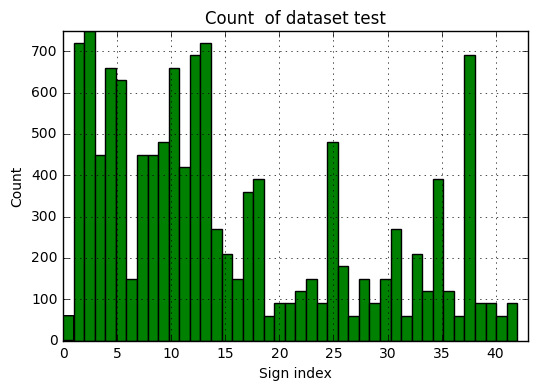

[('Speed limit (20km/h)', 60), ('Dangerous curve to the left', 60), ('Pedestrians', 60), ('End of all speed and passing limits', 60), ('Go straight or left', 60)]
[('Speed limit (50km/h)', 750), ('Speed limit (30km/h)', 720), ('Yield', 720), ('Priority road', 690), ('Keep right', 690)]


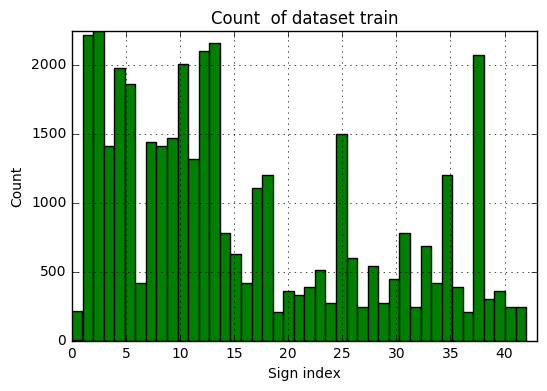

In [64]:
### Count number of each sign in test and train datasets
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

def hist(data, name):
  indicies, counts = np.unique(data, return_counts=True)
  # the histogram of the data
  n, bins, patches = plt.hist(data, len(indicies), facecolor='green')

  plt.xlabel('Sign index')
  plt.ylabel('Count')
  plt.title('Count  of dataset ' + name)
  plt.axis([0, len(indicies), 0, max(counts)])
  plt.grid(True)

  plt.show()
  
def min_counts(data, num_to_print=5):
  indicies, counts = np.unique(data, return_counts=True)
  arr = sorted(list(zip(indicies, counts)), key=lambda x: x[1])
  print([(sign_dict[str(sign[0])], sign[1]) for sign in arr[0:num_to_print]])

def max_counts(data, num_to_print=5):
  indicies, counts = np.unique(data, return_counts=True)
  arr = sorted(list(zip(indicies, counts)), key=lambda x: x[1], reverse=True)
  print([(sign_dict[str(sign[0])], sign[1]) for sign in arr[0:num_to_print]])
  
  
min_counts(y_train)
max_counts(y_train)
hist(y_test, 'test')

min_counts(y_test)
max_counts(y_test)
hist(y_train, 'train')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

#### Preprocess Steps

1. Equalize number of data points (Optional)
2. Add some randomly generated images and an extra label ("none"). This will allow the model to tell us when it can't classify an image. 
3. Convert to greyscale
2. Scale between -1 and 1
5. Split out validation data

The first thing I notice is that in the training set there are over 2000 "speed limit 50 km/h" signs and only 210 "speed limit 20 km/h" signs. That is interesting because those signs specifically are almost the same. The only differnece being a '2' and a '5'. My fear is that having 10x more data of one sign will lead to the network biasing towards the more common sign. I am going to write a function to equalize the number of signs. Its unclear if this si a good idea because it will greatly reduce the overall number of datapoints avaialable. 

In [65]:
### equalize total number of signs. Signs should be shuffled before running this function. 
### This function takes the number of train samples down from 39209 to 9030 and the test set from 12630 to 2580.
def equalize(X_data, y_data):
  indicies, counts = np.unique(y_data, return_counts=True)
  min_count = min(counts)
  
  index_count = np.zeros(max(indicies)+1)
  X_result = []
  y_result = []
  for i in range(len(X_data)):
    sign_index = y_data[i]
    if index_count[sign_index] < min_count:
      X_result.append(X_data[i])
      y_result.append(y_data[i])
      index_count[sign_index] += 1

  return (X_result, y_result)

# test_x, test_y = equalize(X_test, y_test)

I think it is helpful to normalize the image data between -1 and 1, so I will add a function for that. 

In [66]:
### Normalize data
def scale(X_data):
  return np.divide(np.subtract(np.array(X_data, dtype='float32'), 128), 128)

There is no reason an image has to have a sign in it. It that is the case, the model should return "none".

In [67]:
def add_fake_data(X_data, y_data, num_points):
  shape = (len(X_data[0]), len(X_data[0][0]), len(X_data[0][0][0]))
  new_index = max(y_data) + 1
  max_val = np.max(X_data)
  min_val = np.min(X_data)
  
  for i in range(num_points):
    X_data.append(fake_data_point(shape, min_val, max_val))
    y_data.append(new_index)
  return (X_data, y_data)
    
def fake_data_point(shape, min_val, max_val):
  data = np.zeros(shape, dtype='int8')
  for i in range(shape[0]):
    for j in range(shape[1]):
      for k in range(shape[2]):
        data[i][j][k] = random.randint(min_val, max_val)
      
  return data

In theory, the neural network should be robust enough to not require converting to greyscale, but because we don't actually have that many data points, I think converting to greyscale first will help. TODO, come back to how it will help. 

In [68]:
def to_greyscale(X_data):
  return [rgb2gray(image) for image in X_data]

def rgb2gray(rgb):
    gray = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return [[[val] for val in row] for row in gray]

In [69]:
### Reset data before resetting pipeline
train_pipeline_complete = False
test_pipeline_complete = False

data = load.load_data()

print("Done!")

X_train, y_train = (data.train.features, data.train.labels)
X_test, y_test = (data.test.features, data.test.labels)


Loading project data.
Data already unzipped.
Returning ProjectData(train, test).
Done!


In [70]:
### Pipeline
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Don't run this twice
if train_pipeline_complete == False:
  print("Starting pipeline for training data.")
  X_train, y_train = equalize(X_train, y_train)
  indicies, counts = np.unique(y_train, return_counts=True)
  X_train, y_train = add_fake_data(X_train, y_train, min(counts))
  X_train = to_greyscale(X_train)
  X_train = scale(X_train)
  sign_dict[str(max(y_train))] = "none"
  X_train, y_train = shuffle(X_train, y_train)
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
  
  train_pipeline_complete = True
  print("Finished pipeline for training data.")
else:
  print("Already preprocessed train data. To re-run, reset previous cell.")
  
# Don't run this twice
if test_pipeline_complete == False:
  print("Starting pipeline for test data.")
  X_test, y_test = equalize(X_test, y_test)
#   indicies, counts = np.unique(y_data, return_counts=True)
#   X_test, y_test = add_fake_data(X_test, y_test, min(counts)) ## TODO: should I leave this in?
  X_test = to_greyscale(X_test)
  X_test = scale(X_test)
  test_pipeline_complete = True 
  print("Finished pipeline for test data.")
else:
  print("Already preprocessed test data. To re-run, reset previous cell.")

Starting pipeline for training data.
Finished pipeline for training data.
Starting pipeline for test data.
Finished pipeline for test data.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [14]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 64

In [74]:
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1, padding='VALID'):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
  
def maxpool2d(x, k=2, padding='VALID'):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding=padding)
  
# Hyperparameters
w_mu = 0.0
w_sigma = 0.1

n_classes = len(np.unique(y_train + y_valid + y_test))

# (height, width, input_depth, output_depth)
weights = {
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # 5x5 conv, 1 input, 6 outputs. 
    'cnn1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=w_mu, stddev=w_sigma)),
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    # 5x5 conv, 6 inputs, 16 outputs
    'cnn2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=w_mu, stddev=w_sigma)),
    # Fully Connected 1: Input = 400. Output = 120
    'fc1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean=w_mu, stddev=w_sigma)),
    # Fully Connected 2: Input = 120. Output = 84.
    'fc2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean=w_mu, stddev=w_sigma)),
    # Fully Connected 3: Input = 84. Output = 44.
    'out': tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=w_mu, stddev=w_sigma))
}

# filter bias is (output_depth,)
biases = {
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    'cnn1': tf.Variable(tf.zeros(6)),
    # Layer 2: Convolutional. Output = 10x10x16.
    'cnn2': tf.Variable(tf.zeros(16)),
    # Fully Connected 1: Input = 400. Output = 120
    'fc1': tf.Variable(tf.zeros(120)),
    # Fully Connected 2: Input = 120. Output = 84.
    'fc2': tf.Variable(tf.zeros(84)),
    # Fully Connected 3: Input = 84. Output = 44.
    'out': tf.Variable(tf.zeros(n_classes))
}

def LeNet(x):   
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # TODO: Activation 1.
    cnn1 = conv2d(x, weights['cnn1'], biases['cnn1'])
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = maxpool2d(cnn1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # TODO: Activation 2.
    cnn2 = conv2d(pool1, weights['cnn2'], biases['cnn2'])

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = maxpool2d(cnn2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(pool2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc0, weights['fc1']), biases['fc1'])
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['fc2']), biases['fc2'])
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 44.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
#     TODO: Activation.
#     logits = tf.nn.relu(logits)
    
    return logits

In [28]:
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 1))
y = tf.placeholder(tf.int32, shape=(None))
one_hot_y = tf.one_hot(y, n_classes + 1)

In [29]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [58]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [41]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(10):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet_' + iteration)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.519

EPOCH 2 ...
Validation Accuracy = 0.771

EPOCH 3 ...
Validation Accuracy = 0.849

EPOCH 4 ...
Validation Accuracy = 0.900

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.940

EPOCH 7 ...
Validation Accuracy = 0.937

EPOCH 8 ...
Validation Accuracy = 0.948

EPOCH 9 ...
Validation Accuracy = 0.954

EPOCH 10 ...
Validation Accuracy = 0.958

Model saved


In [57]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

[16  5 38 33 11 38 18 12 25 35 12  7 19 32 12  9 23 20 27 38  4 33  9 25  4
 11 13 10 10 11  5 17 34 19  2 17  3 12 16 20  7 30 18  8 24 11  3 10 20  8
 39 13 15  9 13 35 10 26  9 16 36  4  4  7]
[16  1 38 33 11 38 18 12 25 35 12  7 23  7  4  9 21 20 27 38  4 33  9  3  1
 11 13 10  9 11  5 17 34 23  2 17  3 12 16  8  7 30 18 12 24 25  3 10 18  8
 25 13 15  9 13 35  5 26  9 16 38 10  4  9]
[15  9 26  5  5 30 11 25 20 34  5 12  5 35 24 37 19 33 25 32 10 35  3 12 22
 13  8  5  1 14 12 32  3 38  9 33 12 10  4 11 33  7 35 29 33  4  0 14 16 10
 20  3 27 22 12 12 13  8 12  8  1 10 35 20]
[15  9 26  2  5 28 11 25 30 34  5 12  1 10 25 25 21 33 25  7 10 35  3  7 22
 13  3  1  2 14 12 32  3 38  9 33  1 10  5 11 33  4 35 25 33  4  1 14 16 10
 30  3 27 29  1 17 13  7  1  8  2 10 10 30]
[ 1  6 36 20 14 13 11 10 26 40  1 38 41  3  6 26 17 21  2  8 11 21  7 24 30
 25 17  8  6  9  8  4 13 16  0 19 26  9 13 14 29 17 13 38 18 20 33  2  3 40
 13  5  8  7 36 25 20 25 20  7 10  7 20 29]
[ 1  6 36  3 14 13 1

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.